In [1]:
'''
brew install libomp (for OSX)
pip install torchtext -U
'''
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as patheffects
import os

import time

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

pytorch 1.1.0
torchvision 0.3.0


# Download Model

In [2]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load Image

In [3]:
def bb_hw(a): return np.array([a[0],a[1],a[2]-a[0]+1,a[3]-a[1]+1])

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b):    
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))    
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [4]:
def inferAndShow(filename, threshold, model):
    stime = time.time()
    #print("stime", stime)
    img = Image.open(filename)
#     plt.figure(figsize=(16, 16))
#     plt.imshow(img)
    trans = T.Compose([    
        T.ToTensor(), 
    ])
    input_img = trans(img)
    input_img = input_img.cuda()
    result = model([input_img])[0]    
    
    ax = show_img(img, figsize=(16, 16)) 
    for box, score, label in zip(result['boxes'], result['scores'], result['labels']):
        score = score.item()
        if score <= threshold :
            break
        box = box.detach().cpu().clone().numpy()
        b = bb_hw(box)
        draw_rect(ax, b)
        resultscore = "{}, {:1.3f}".format( COCO_INSTANCE_CATEGORY_NAMES[label.item()], score )
        draw_text(ax, b[:2], resultscore )
    
    
    #print("duration={}".format(time.time() - stime ))
    

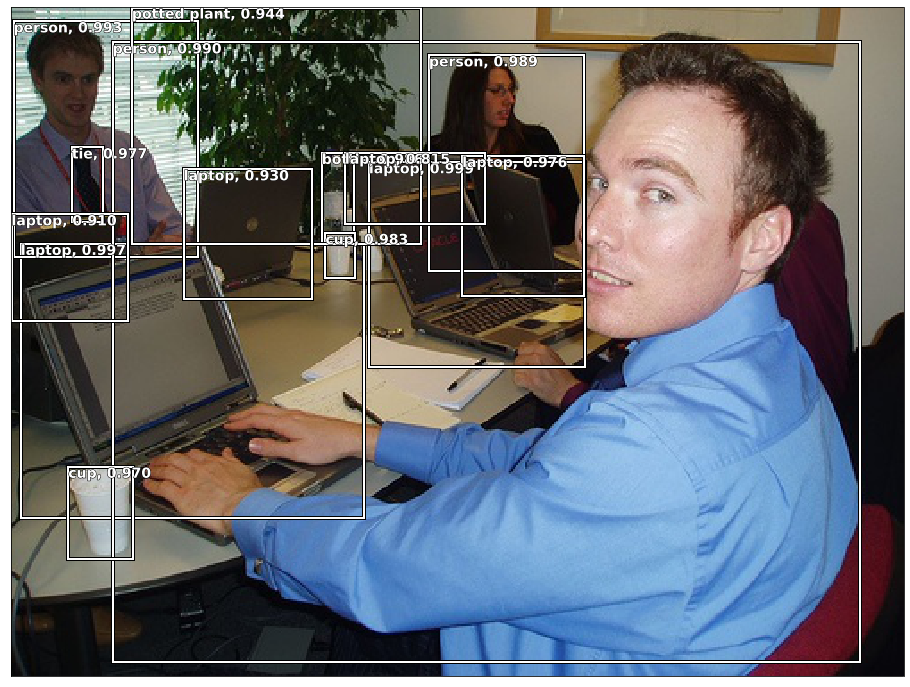

In [7]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model = model.eval()
model.cuda()
sourcefolder = 'C:/Users/10008000/imgs'
#inferAndShow(os.path.join(sourcefolder, '000120.jpg') , 0.8, model )
#inferAndShow(os.path.join(sourcefolder, '000121.jpg') , 0.8, model )
#inferAndShow(os.path.join(sourcefolder, '000122.jpg') , 0.8, model )
#inferAndShow(os.path.join(sourcefolder, '000123.jpg') , 0.8, model )
inferAndShow(os.path.join(sourcefolder, '000124.jpg') , 0.8, model )
